In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def imshow(title = "Image", image = None, size = 8):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

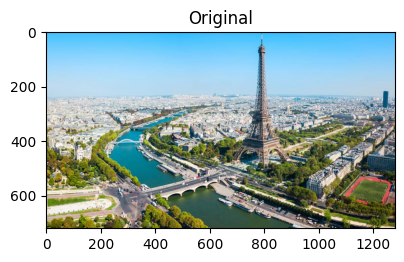

In [3]:
image = cv2.imread("images/image.jpg")
imshow("Original", image)

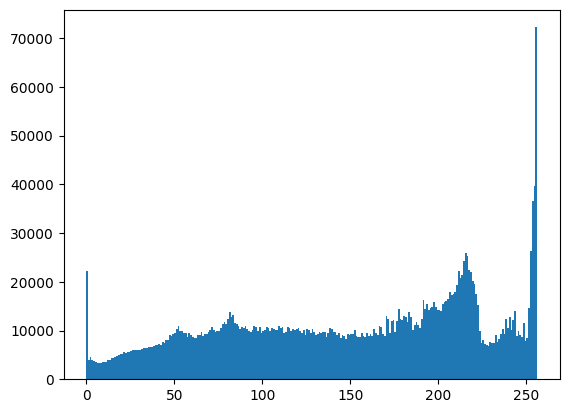

In [4]:
plt.hist(image.ravel(), 256, [0, 256])
plt.show()

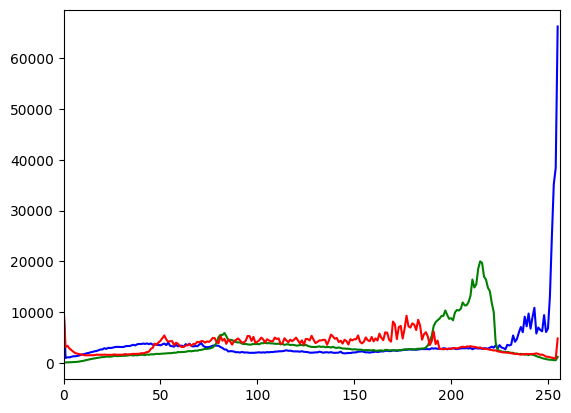

In [6]:
color = ("b", "g", "r")
for i, col in enumerate(color):
    hist2 = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(hist2, color=col)
    plt.xlim([0, 256])
plt.show()

In [17]:
def centroidHistogram(clt):
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)
    hist = hist.astype("float")
    hist /= hist.sum()
    
    return hist

def plotColors(hist, centroids):
    bar = np.zeros((100, 500, 3), dtype="uint8")
    
    x_start = 0
    for (percent, color) in zip(hist, centroids):
        end = x_start + (percent*500)
        cv2.rectangle(bar, (int(x_start), 0), (int(end), 100), color.astype("uint8").tolist(), -1)
        x_start = end
    return bar

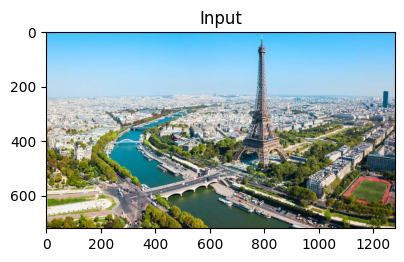

(720, 1280, 3)
(921600, 3)


c:\users\bohdan\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


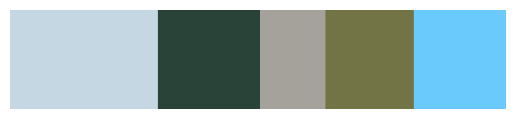

In [18]:
from sklearn.cluster import KMeans

image = cv2.imread("images/image.jpg")
imshow("Input", image)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)
image = image.reshape((image.shape[0]*image.shape[1], 3))
print(image.shape)

number_of_clusters = 5
clt = KMeans(number_of_clusters)
clt.fit(image)

hist = centroidHistogram(clt)
bar = plotColors(hist, clt.cluster_centers_)

plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()